In [18]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

In [3]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [4]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/'
learn_gam = rdrive + 'scikit/gam_spec/'
learn_nuc = rdrive + 'scikit/nuc_conc/'

In [44]:
dets = ['nuc29', 'act32', 'act4/9', 'd1_hpge', 'd2_hpge', 'd3_czt', 'd6_sri2', 'd5_labr3', 'd4_nai']
pred = ['reactor', 'burnup', 'enrichment', 'cooling']
predmll = ['ReactorType', 'Burnup', 'Enrichment', 'CoolingTime']
# for dataframes
algcol = ['knn_auto', 'dtree_auto']#, 'knn31', 'dtree31', 'knn113', 'dtree113']
scrcol  = ['Accuracy', 'Acc Std']
errcol = ['Neg MAE', 'MAE Std']
tfrac = '_tset1.0_'

In [ ]:
# 2nd attempt results
#with open(rdrive + 'scikit/cv_errnscores.pkl', 'rb') as handle:
#    err_results = pickle.load(handle)

## 2nd, nope, 3rd Attempt to Mimic MLL but with Cross Validation
#### CV = 15, ~7% tested in each fold
#### CV = 10, 10% tested in each fold
#### CV = 5, 20% tested in each fold

(attempt 2 was using cross_validate, but attempt 3 is cross_val_predict so I'm not just getting averages back from each CV fold)

the dataframes are now saved on research drive because it's much faster to run them on BAM ERB computer

In [6]:
# 3rd attempt results
with open(rdrive + 'processed_results/old/old_cv_pred_cv_5_10_15_nobackup.pkl', 'rb') as handle:
    results = pickle.load(handle)

In [8]:
results.keys()

dict_keys(['5', '10', '15'])

In [63]:
100 * (np.abs(results['10']['burnup']) - np.abs(results['15']['burnup'])) / np.abs(results['15']['burnup'])

Algorithm  knn_auto            dtree_auto               knn31            \
Metric      Neg MAE    MAE Std    Neg MAE   MAE Std   Neg MAE   MAE Std   
nuc29       1.28642   0.334139   0.530423  0.257411   1.28642  0.334139   
act32       1.84784    1.12784   0.469119 -0.724197   1.84784   1.12784   
act4/9     0.332778  -0.413131   0.719242  0.731227  0.142499  0.426779   
d1_hpge     0.82745   0.444301     2.1586   1.04953   1.34204  0.647805   
d2_hpge    0.288748 -0.0477976    1.90989   1.11393   1.38232  0.938489   
d3_czt     0.549828   0.232761    1.59564    1.0124  0.832875  0.427918   
d6_sri2     1.23308   0.678515    2.08235   1.48117   1.49277    1.1579   
d5_labr3    1.11905   0.807375     1.7105  0.955733   1.18928  0.804688   
d4_nai     0.970837   0.926919   0.825531  0.360106   1.10717  0.623688   

Algorithm   dtree31              knn113            dtree113            
Metric      Neg MAE   MAE Std   Neg MAE   MAE Std   Neg MAE   MAE Std  
nuc29      0.530423  0.257411   1.28642  0.334139  0.530423  0.257411  
act32      0.469119 -0.724197   1.84784   1.12784  0.469119 -0.724197  
act4/9    -0.180561 -0.156148  0.332778 -0.413131  0.719242  0.731227  
d1_hpge     2.13354   1.22924   1.34375  0.734463   1.53338   1.42927  
d2_hpge     1.49908   1.14708   1.21708  0.758371   1.47577  0.824803  
d3_czt     0.633819  0.691461   1.21375  0.590065  -0.19573 -0.663583  
d6_sri2     1.64842  0.944214   1.36675  0.906132   1.05616  0.758084  
d5_labr3    1.50922   1.04424   1.34038   1.02363  0.609868  0.373063  
d4_nai     0.613813  0.468575   1.13725  0.813398  0.513475 -0.112527

## Plotting

### Plots for dissertation (showing no change)

In [90]:
x = ['Nuc29', 'Act32', 'Act4/9', 'L/HPGe', 'P/HPGe', 'CZT', 'SrI2', 'LaBr3', 'NaI']

def plot_compare(pred_param):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6))
    ax.set_xlabel('Detector Type', fontsize=20, labelpad=15)
    if pred_param == 'reactor':
        ax.set_ylabel('Accuracy Score', fontsize=20, labelpad=15)
        metric = scrcol[0]
        std = scrcol[1]
    else:
        err = 'Negative MAE'
        if pred_param == 'burnup':
            yaxlbl = err + ' [MWd/MTU]'
        elif pred_param == 'enrichment':
            yaxlbl = err + ' [% $^{235}$U]'
        else:
            yaxlbl = err + ' [days]'
        ax.set_ylabel(yaxlbl, fontsize=20, labelpad=15)
        metric = errcol[0]
        std = errcol[1]
    
    algcol = ['knn_auto', 'dtree_auto', 'knn_auto', 'dtree_auto', 'knn_auto', 'dtree_auto',]
    d_x = [-0.2, -0.1, 0.0, 0.1, 0.2, 0.3]
    c = ['LBrwn', 'LTeal', 'MBrwn', 'MTeal', 'DBrwn', 'DTeal']
    lbl = ['kNN, CV=5', 'Dec Tree, CV=5', 'kNN, CV=10', 'Dec Tree, CV=10', 'kNN, CV=15', 'Dec Tree, CV=15']
    for i, alg in enumerate(algcol):
        if i == 0 or i == 1:
            cv = '5'
        elif i == 2 or i == 3:
            cv = '10'
        else:
            cv = '15'
        plotdf = results[cv][pred_param]
        y = np.array(plotdf[alg][metric], dtype=float)
        trans = Affine2D().translate(d_x[i], 0.0) + ax.transData
        ax.plot(x, y, transform=trans, color=colors[c[i]], marker='o', linestyle='None', mew=0, ms=6, label=lbl[i])
        #ax.axhline(y=0, color='k', linestyle='-', linewidth=2)
        ax.tick_params(labelsize=14, labelrotation=45)
        ax.legend(loc='best')
    #fig.suptitle(title, fontsize=22)
    #fig.subplots_adjust(top=.85)
    plt.show()

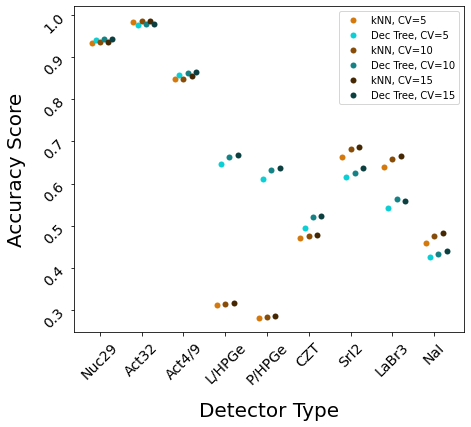

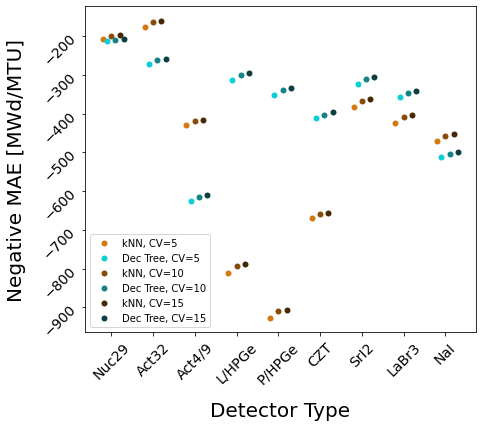

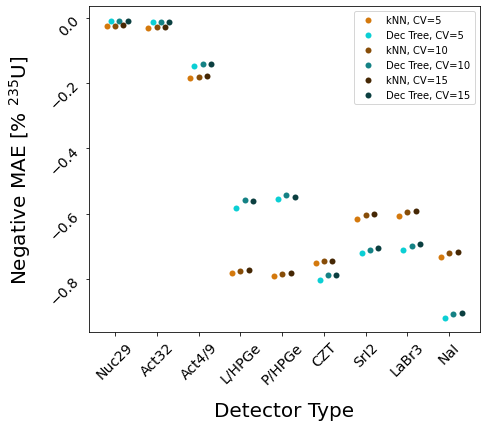

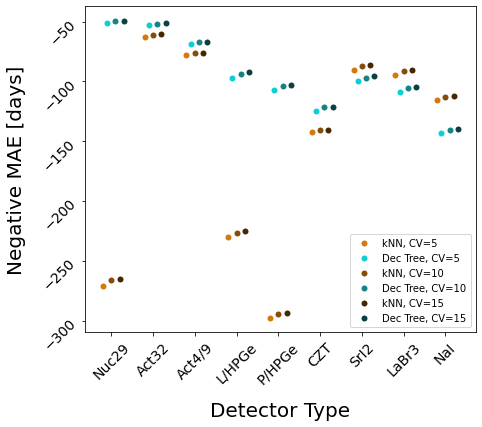

In [92]:
plot_compare('reactor')
plot_compare('burnup')
plot_compare('enrichment')
plot_compare('cooling')

In [111]:
x = ['Nuc29', 'Act32', 'Act4/9', 'L/HPGe', 'P/HPGe', 'CZT', 'SrI2', 'LaBr3', 'NaI']
d_x = [-0.1, 0.0]

def plot_diffs(pred_param):
    fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(18,6))
    axs[1].set_xlabel('Detector Type', fontsize=20, labelpad=15)
    if pred_param == 'reactor':
        axs[0].set_ylabel('% Difference in Accuracy Score', fontsize=20, labelpad=15)
        metric = scrcol[0]
        std = scrcol[1]
    else:
        err = '% Difference in MAE'
        if pred_param == 'burnup':
            yaxlbl = err + ' [MWd/MTU]'
        elif pred_param == 'enrichment':
            yaxlbl = err + ' [% U235]'
        else:
            yaxlbl = err + ' [days]'
        axs[0].set_ylabel(yaxlbl, fontsize=20, labelpad=15)
        metric = errcol[0]
        std = errcol[1]
    
    c = ['MBrwn', 'MTeal']
    lbl = ['kNN', 'Dec Tree']
    diffs = pd.DataFrame()
    for cv, ax in zip(['10', '15'], axs):
        ax.set_title('CV = ' + cv + ', Auto Energy Windows List', fontsize=16, pad=15)
        plotdf = 100 * (np.abs(results[cv][pred_param]) - np.abs(results['5'][pred_param])) / np.abs(results['5'][pred_param])
        for i, alg in enumerate(algcol):
            y = np.array(plotdf[alg][metric], dtype=float)
            diffs['CV' + cv + '_' + alg] = plotdf[alg][metric]
            trans = Affine2D().translate(d_x[i], 0.0) + ax.transData
            ax.plot(x, y, transform=trans, color=colors[c[i]], marker='o', linestyle='None', mew=0, ms=6, label=lbl[i])
        #ax.axhline(y=0, color='k', linestyle='-', linewidth=2)
        ax.tick_params(labelsize=12, labelrotation=45)
        ax.legend(loc='upper left')
    #fig.suptitle(title, fontsize=22)
    #fig.subplots_adjust(top=.85)
    plt.show()
    
    return fig, diffs

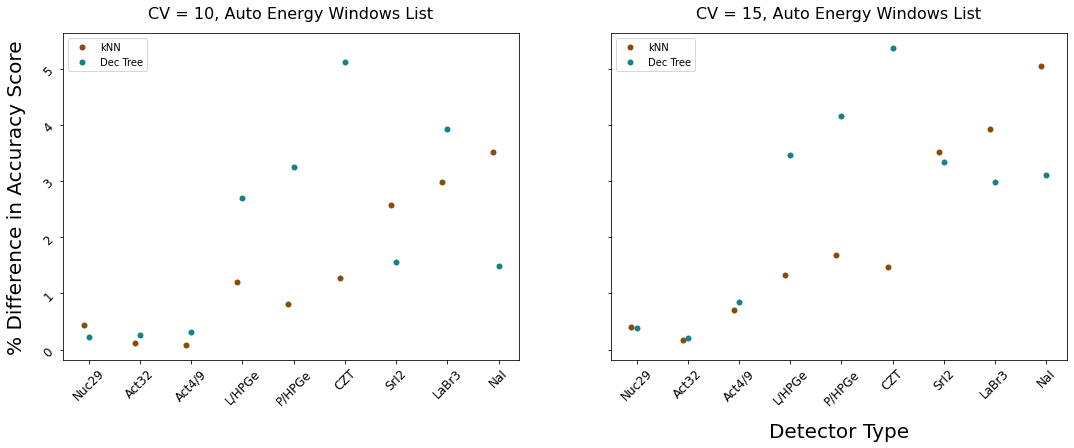

CV10_knn_auto      0.431759
CV10_dtree_auto    0.231507
CV15_knn_auto      0.410568
CV15_dtree_auto    0.385828
Name: nuc29, dtype: object


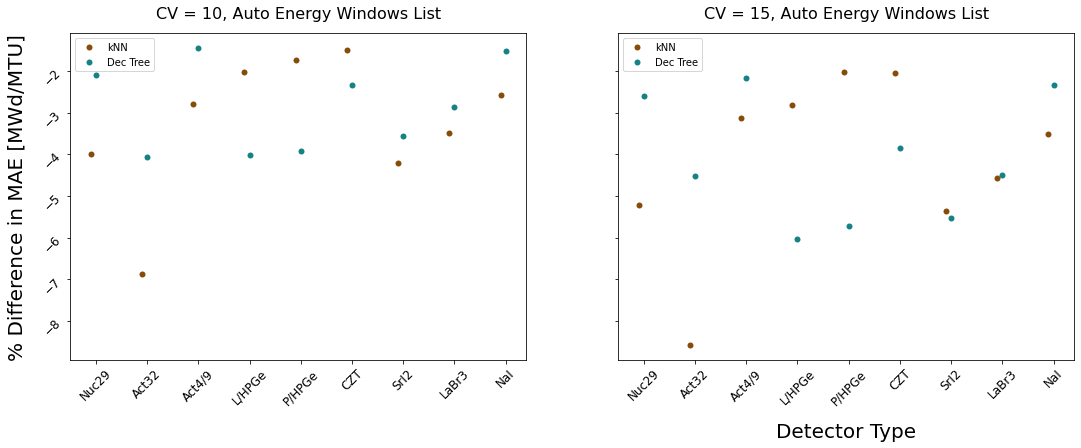

CV10_knn_auto      -3.9882
CV10_dtree_auto   -2.09191
CV15_knn_auto     -5.20763
CV15_dtree_auto    -2.6085
Name: nuc29, dtype: object


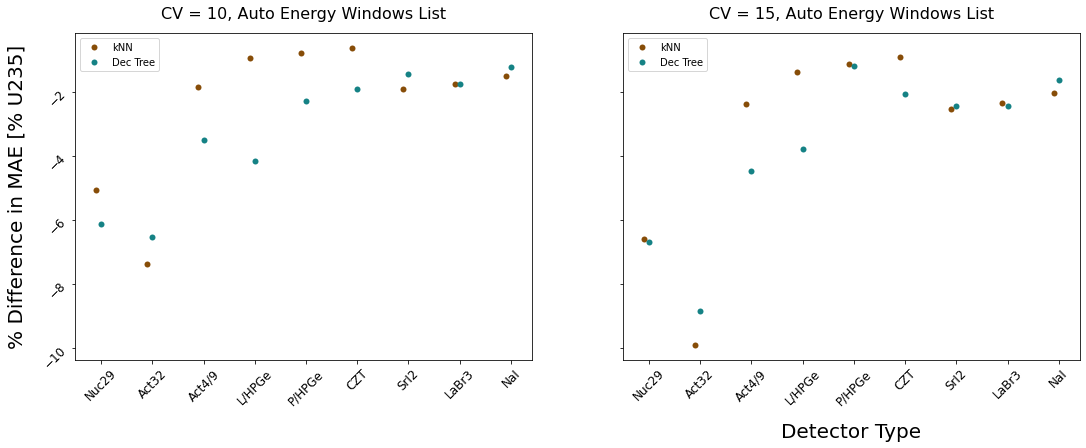

CV10_knn_auto     -5.07676
CV10_dtree_auto   -6.12072
CV15_knn_auto     -6.60219
CV15_dtree_auto   -6.68955
Name: nuc29, dtype: object


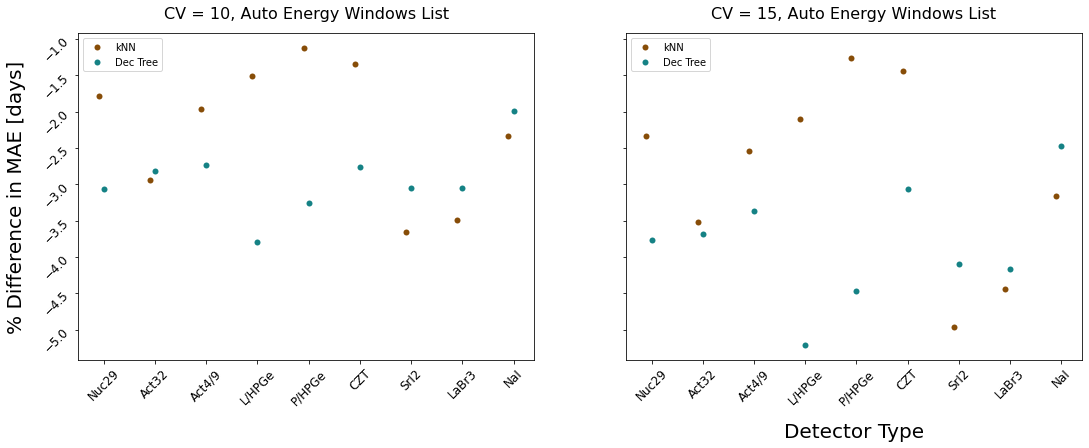

CV10_knn_auto     -1.78743
CV10_dtree_auto   -3.06611
CV15_knn_auto     -2.33638
CV15_dtree_auto   -3.76949
Name: nuc29, dtype: object


In [114]:
fig, diffs = plot_diffs('reactor')
print(diffs.loc['nuc29'])
fig, diffs = plot_diffs('burnup')
print(diffs.loc['nuc29'])
fig, diffs = plot_diffs('enrichment')
print(diffs.loc['nuc29'])
fig, diffs = plot_diffs('cooling')
print(diffs.loc['nuc29'])

### Old plots

In [10]:
x = ['Nuc29', 'Act32', 'Act4/9', 'L/HPGe', 'P/HPGe', 'CZT', 'SrI2', 'LaBr3', 'NaI']
_x = np.arange(len(x))
d_x = [-0.2, -0.1, 0.0, 0.1, 0.2, 0.3]

In [13]:
def plot_cv_curves(pred_param, title):
    fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18,6))
    axs[1].set_xlabel('Detector Type', fontsize=20, labelpad=15)
    if pred_param == 'reactor':
        axs[0].set_ylabel('Accuracy Score', fontsize=20, labelpad=15)
        metric = scrcol[0]
        std = scrcol[1]
    else:
        err = 'Negative MAE'
        if pred_param == 'burnup':
            yaxlbl = err + ' [MWd/MTU]'
        elif pred_param == 'enrichment':
            yaxlbl = err + ' [% U235]'
        else:
            yaxlbl = err + ' [days]'
        axs[0].set_ylabel(yaxlbl, fontsize=20, labelpad=15)
        metric = errcol[0]
        std = errcol[1]
    
    c = ['LBrwn', 'LTeal', 'MBrwn', 'MTeal', 'DBrwn', 'DTeal']
    lbl = ['kNN Auto', 'Dec Tree Auto', 'kNN 31', 'Dec Tree 31', 'kNN 113', 'Dec Tree 113']
    for cv, ax in zip(['5', '10', '15'], axs):
        ax.set_title('CV = ' + cv, fontsize=16, pad=15)
        plotdf = results[cv][pred_param]
        for i, alg in enumerate(algcol):
            y = np.array(plotdf[alg][metric], dtype=float)
            sd = np.array(plotdf[alg][std], dtype=float)
            _, _, bars = ax.errorbar(_x+d_x[i], y, yerr=sd, color=colors[c[i]], marker='o', linestyle='None', mew=0, ms=6, elinewidth=3, label=lbl[i])
            [bar.set_alpha(0.7) for bar in bars]
            plt.xticks(_x, x)
        ax.tick_params(labelsize=12, labelrotation=45)
        ax.legend(loc='lower left')
    fig.suptitle(title, fontsize=22)
    fig.subplots_adjust(top=.85)
    plt.show()

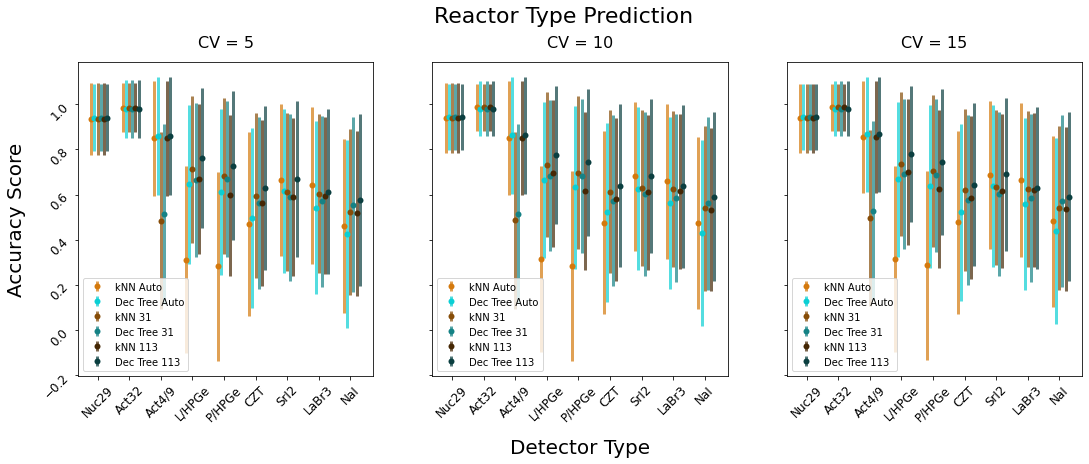

In [14]:
plot_cv_curves('reactor', 'Reactor Type Prediction')

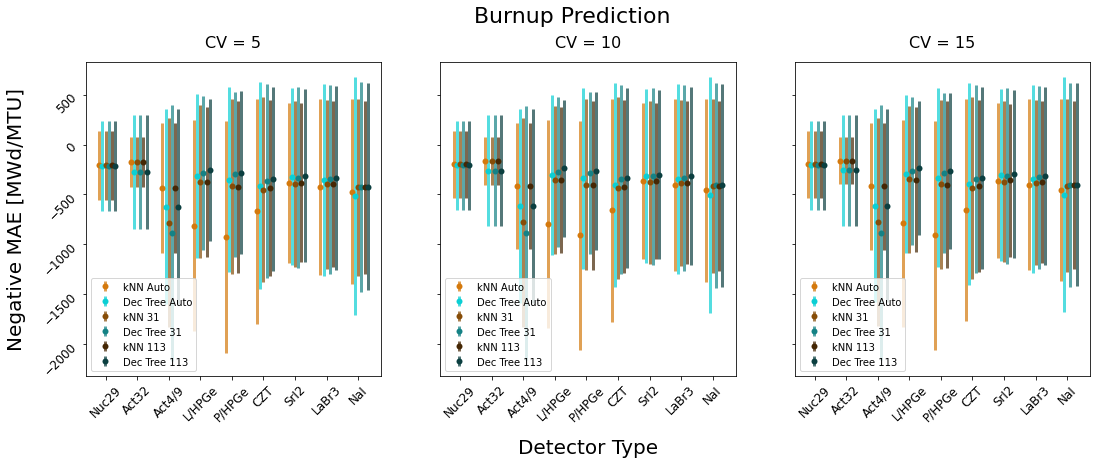

In [15]:
plot_cv_curves('burnup', 'Burnup Prediction')

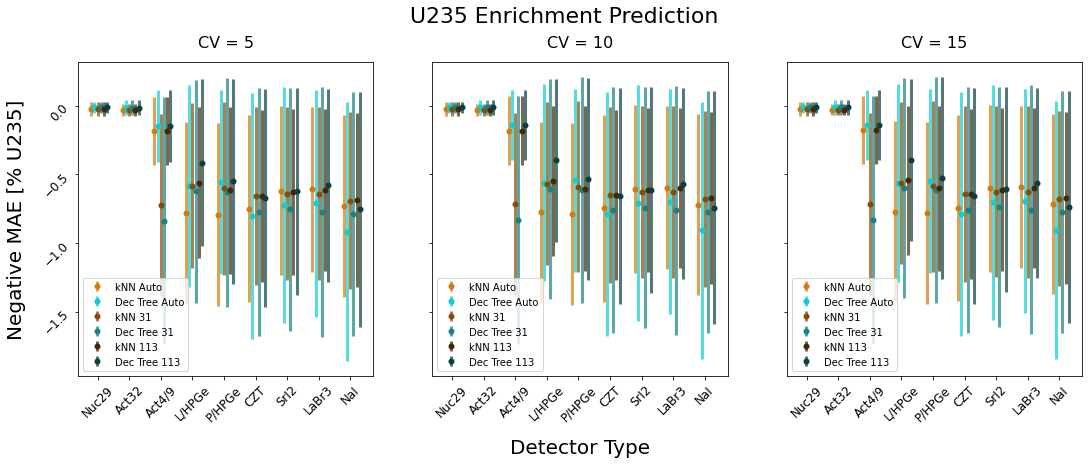

In [16]:
plot_cv_curves('enrichment', 'U235 Enrichment Prediction')

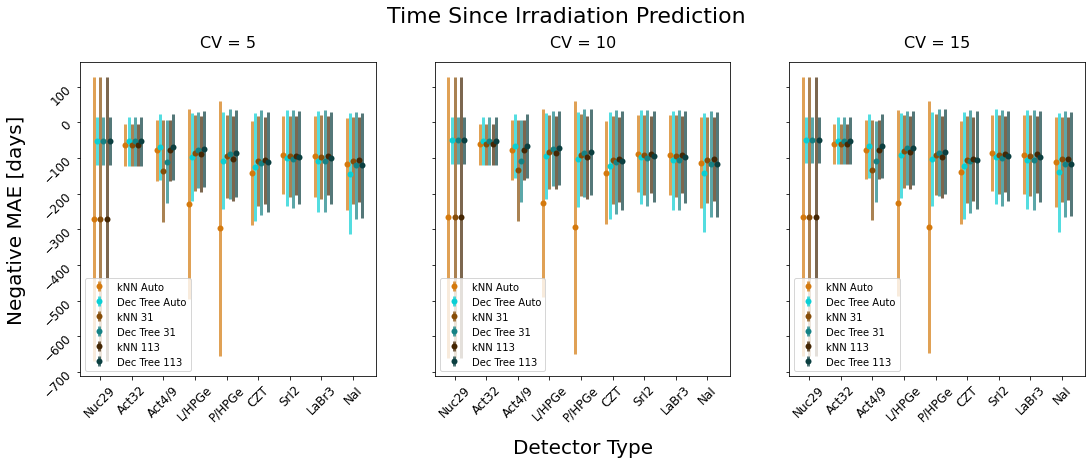

In [17]:
plot_cv_curves('cooling', 'Time Since Irradiation Prediction')

## 1st Attempt to Mimic MLL: 6.7% test set, no cross validation

In [7]:
def rxtr_metrics(df, d, knn, dtr):
    dfmetric = 'Accuracy'
    dfstd = 'Acc Std'
    errname = 'AbsError'    
    for en_list in ['31', '_auto', '113']:
        for a, A, alg in zip(['knn', 'dtree'], ['kNN', 'DTree'], [knn, dtr]):
            df.loc[d, (a+en_list, dfmetric)] = balanced_accuracy_score(alg[en_list]['TrueY'], alg[en_list][A], adjusted=True)
            df.loc[d, (a+en_list, dfstd)] = alg[en_list][errname].std()
    return df

def reg_metrics(df, d, knn, dtr):
    dfmetric = 'Neg MAE'
    dfstd = 'MAE Std'
    errname = 'AbsError'    
    for en_list in ['31', '_auto', '113']:
        for a, A, alg in zip(['knn', 'dtree'], ['kNN', 'DTree'], [knn, dtr]):
            df.loc[d, (a+en_list, dfmetric)] = -mean_absolute_error(alg[en_list]['TrueY'], alg[en_list][A])
            df.loc[d, (a+en_list, dfstd)] = alg[en_list][errname].std()
    return df

In [8]:
csv_end = '_mimic_mll.csv'
extra_dir = 'test_0.067_only/'
no_cv_results = {}
for p in pred:
    if p == 'reactor':
        levels = [algcol, scrcol]
    else: 
        levels = [algcol, errcol]
    df = pd.DataFrame(index=dets, columns=pd.MultiIndex.from_product(levels, names=["Algorithm", "Metric"]))
    for d in dets:
        learn_path = learn_gam + extra_dir
        knncsv = p + '_knn' + tfrac + d + csv_end
        dtrcsv = p + '_dtree' + tfrac + d + csv_end
        if 'nuc' in d or 'act' in d:
            if d == 'act4/9':
                knncsv = p + '_knn' + tfrac + 'act4' + csv_end
                dtrcsv = p + '_dtree' + tfrac + 'act4' + csv_end
                knn31 = pd.read_csv(learn_path + 'act4/' + knncsv).drop(columns='Unnamed: 0')
                dtr31 = pd.read_csv(learn_path + 'act4/' + dtrcsv).drop(columns='Unnamed: 0')
                knncsv = p + '_knn' + tfrac + 'act9' + csv_end
                dtrcsv = p + '_dtree' + tfrac + 'act9' + csv_end
                ##### applying act9 to auto, although this isn't accurate #####
                knn_auto = knn113 = pd.read_csv(learn_path + 'act9/' + knncsv).drop(columns='Unnamed: 0')
                dtr_auto = dtr113 = pd.read_csv(learn_path + 'act9/' + dtrcsv).drop(columns='Unnamed: 0')
            else:
                if 'nuc' in d:
                    learn_path = learn_nuc + extra_dir
                knn_auto = knn31 = knn113 = pd.read_csv(learn_path + d + '/' + knncsv).drop(columns='Unnamed: 0')
                dtr_auto = dtr31 = dtr113 = pd.read_csv(learn_path + d + '/' + dtrcsv).drop(columns='Unnamed: 0')
        else:
            knn_auto = pd.read_csv(learn_path + 'auto/' + knncsv).drop(columns='Unnamed: 0')
            dtr_auto = pd.read_csv(learn_path + 'auto/' + dtrcsv).drop(columns='Unnamed: 0')
            knn31 = pd.read_csv(learn_path + 'n31/' + knncsv).drop(columns='Unnamed: 0')
            dtr31 = pd.read_csv(learn_path + 'n31/' + dtrcsv).drop(columns='Unnamed: 0')
            knn113 = pd.read_csv(learn_path + 'n113/' + knncsv).drop(columns='Unnamed: 0')
            dtr113 = pd.read_csv(learn_path + 'n113/' + dtrcsv).drop(columns='Unnamed: 0')
        
        # Error Calcs
        knn = {'31' : knn31, '_auto' : knn_auto, '113' : knn113}
        dtr = {'31' : dtr31, '_auto' : dtr_auto, '113' : dtr113}
        if p == 'reactor':        
            df = rxtr_metrics(df, d, knn, dtr)
        else:
            df = reg_metrics(df, d, knn, dtr)
    no_cv_results[p] = df

In [10]:
no_cv_results['reactor']

Algorithm  knn_auto           dtree_auto               knn31            \
Metric     Accuracy   Acc Std   Accuracy   Acc Std  Accuracy   Acc Std   
nuc29      0.970015  0.141194   0.969496  0.138187  0.970015  0.141194   
act32      0.985293  0.103231   0.979468  0.120904  0.985293  0.103231   
act4/9     0.848518  0.250212   0.871051  0.251671  0.483654  0.392072   
d1_hpge    0.309496  0.411747   0.683224  0.340597  0.728481   0.32292   
d2_hpge    0.284731  0.416559    0.65299  0.356712  0.695582  0.337105   
d3_czt     0.467737  0.403966   0.513984  0.392527   0.61925  0.359124   
d6_sri2    0.692461  0.327352    0.61474  0.357707  0.633169  0.342912   
d5_labr3   0.655347  0.342912   0.562001  0.377903  0.622069  0.343701   
d4_nai     0.495306  0.380379   0.448124  0.411864  0.540868  0.361665   

Algorithm   dtree31              knn113            dtree113            
Metric     Accuracy   Acc Std  Accuracy   Acc Std  Accuracy   Acc Std  
nuc29      0.969496  0.138187  0.970015  0.141194  0.969496  0.138187  
act32      0.979468  0.120904  0.985293  0.103231  0.979468  0.120904  
act4/9      0.52543  0.393857  0.848518  0.250212  0.871051  0.251671  
d1_hpge     0.70057  0.333394  0.724762  0.323599  0.774049  0.303762  
d2_hpge    0.689053  0.337253  0.625286  0.347701  0.735925   0.32042  
d3_czt     0.598429  0.375329  0.616621  0.358137  0.630315  0.359223  
d6_sri2    0.599499  0.366197  0.621772  0.336361  0.690703  0.338878  
d5_labr3    0.56612  0.368915  0.631769  0.339648  0.632913   0.35873  
d4_nai     0.577727  0.381617  0.534409  0.361471  0.557042   0.37634

### Plotting

In [54]:
x = ['Nuc29', 'Act32', 'Act4/9', 'L/HPGe', 'P/HPGe', 'CZT', 'SrI2', 'LaBr3', 'NaI']
_x = np.arange(len(x))
d_x = [-0.2, -0.1, 0, 0.1, 0.2, 0.3]

In [11]:
def plot_curves(pred_param, title, plotdf):
    plt.clf()
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.set_title(title, fontsize=20, pad=15)
    ax.set_xlabel('Detector Type', fontsize=20, labelpad=15)
    if pred_param == 'reactor':
        ax.set_ylabel('Accuracy Score', fontsize=20, labelpad=15)
        metric = scrcol[0]
        std = scrcol[1]
    else:
        err = 'Negative MAE'
        if pred_param == 'burnup':
            yaxlbl = err + ' [MWd/MTU]'
        elif pred_param == 'enrichment':
            yaxlbl = err + ' [% U235]'
        else:
            yaxlbl = err + ' [days]'
        ax.set_ylabel(yaxlbl, fontsize=20, labelpad=15)
        metric = errcol[0]
        std = errcol[1]
    
    x = ['Nuc29', 'Act32', 'Act4/9', 'L/HPGe', 'P/HPGe', 'CZT', 'SrI2', 'LaBr3', 'NaI']
    c = ['LBrwn', 'LTeal', 'MBrwn', 'MTeal', 'DBrwn', 'DTeal']
    lbl = ['kNN Auto', 'Dec Tree Auto', 'kNN 31', 'Dec Tree 31', 'kNN 113', 'Dec Tree 113']
    for i, alg in enumerate(algcol):
        y = np.array(plotdf[alg][metric], dtype=float)
        sd = np.array(plotdf[alg][std], dtype=float)
        ax.plot(x, y, 'o-', color=colors[c[i]], mew=0, ms=5, label=lbl[i])
        ax.fill_between(x, y - sd, y + sd, color=colors[c[i]], alpha=0.2)
    
    ax.tick_params(labelsize=12)
    ax.legend(loc='best')
    plt.show()

<Figure size 432x288 with 0 Axes>

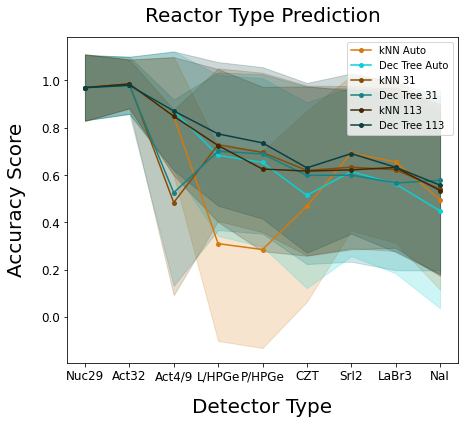

In [12]:
pred_param = 'reactor'
plot_curves(pred_param, 'Reactor Type Prediction', no_cv_results[pred_param])

<Figure size 432x288 with 0 Axes>

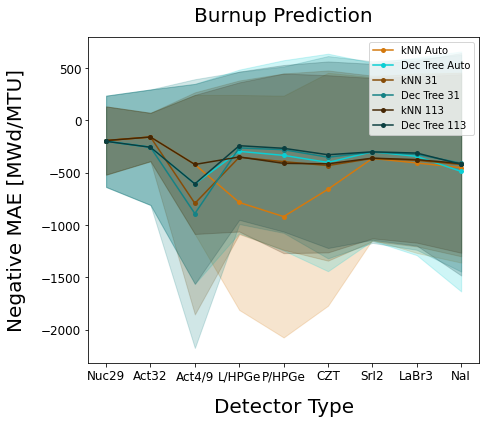

In [13]:
pred_param = 'burnup'
plot_curves(pred_param, 'Burnup Prediction', no_cv_results[pred_param])

<Figure size 432x288 with 0 Axes>

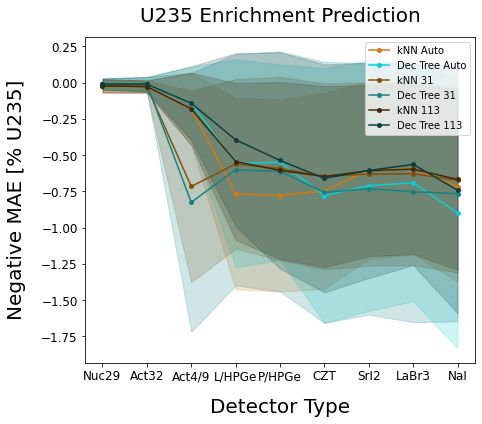

In [14]:
pred_param = 'enrichment'
plot_curves(pred_param, 'U235 Enrichment Prediction', no_cv_results[pred_param])

<Figure size 432x288 with 0 Axes>

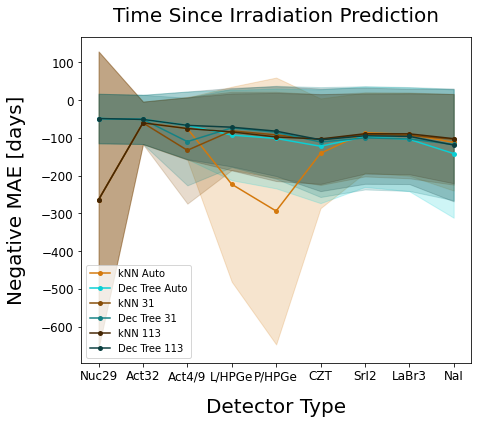

In [15]:
pred_param = 'cooling'
plot_curves(pred_param, 'Time Since Irradiation Prediction', no_cv_results[pred_param])

## Learning Curves

Tested a tangentially related "learning curve"...not by varying the trainset size but by varying the testset size. No curve was found in this misguided experiment

In [ ]:
# copied from htc_prep
fracs = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.23, 0.25, 0.27, 0.3]

In [7]:
def grab_data(pred, det, dirname):
    if 'nuc' in det:
        learn_path = learn_nuc + 'testset_learncurve'
    else:
        learn_path = learn_gam + 'testset_learncurve'
    k_data = []
    d_data = []
    for frac in fracs:
        knncsv = pred + '_knn_' + 'tset' + str(frac) + '_' + det + csv_end
        dtrcsv = pred + '_dtree_' + 'tset' + str(frac) + '_' + det + csv_end
        knn = pd.read_csv(learn_path + dirname + '/' + knncsv).drop(columns='Unnamed: 0')
        dtr = pd.read_csv(learn_path + dirname + '/' + dtrcsv).drop(columns='Unnamed: 0')
        for col, alg in zip(['kNN', 'DTree'], [knn, dtr]):
            if pred == 'reactor':        
                y = balanced_accuracy_score(alg['TrueY'], alg[col], adjusted=True)
            else:
                y = -mean_absolute_error(alg['TrueY'], alg[col])
            std = alg['AbsError'].std()
            if col == 'kNN':
                k_data.append((y, std))
            else:
                d_data.append((y, std))
    return k_data, d_data

In [ ]:
def plot_learncurves(pred_param, det_idx, dirname):
    plt.clf()
    fig = plt.figure(figsize=(4, 3))
    ax = fig.add_subplot(111)
    ax.set_title(pred_param + ' ' + dets[det_idx], fontsize=16, pad=15)
    ax.set_xlabel('Fraction of Trainset DB for Testset', fontsize=16, labelpad=15)
    if pred_param == 'reactor':
        ax.set_ylabel('Accuracy Score', fontsize=16, labelpad=15)
    else:
        err = 'Negative MAE'
        if pred_param == 'burnup':
            yaxlbl = err + ' [MWd/MTU]'
        elif pred_param == 'enrichment':
            yaxlbl = err + ' [% U235]'
        else:
            yaxlbl = err + ' [days]'
        ax.set_ylabel(yaxlbl, fontsize=16, labelpad=15)
    
    x = fracs
    c = ['MBrwn', 'MTeal']
    lbl = ['kNN', 'Dec Tree']
    knn, dtr = grab_data(pred_param, dets[det_idx], dirname)
    for i, data in enumerate([knn, dtr]):
        y = np.array([d[0] for d in data])
        sd = np.array([d[1] for d in data])
        ax.plot(x, y, 'o-', color=colors[c[i]], mew=0, ms=5, label=lbl[i])
        ax.fill_between(x, y - sd, y + sd, color=colors[c[i]], alpha=0.2)
    
    ax.tick_params(labelsize=12)
    ax.legend(loc='best')
    plt.show()

In [ ]:
dets = ['nuc29', 'act32', 'act4/9', 'd1_hpge', 'd2_hpge', 'd3_czt', 'd6_sri2', 'd5_labr3', 'd4_nai']
# do not use idx of 2 since code can't handle it

<Figure size 432x288 with 0 Axes>

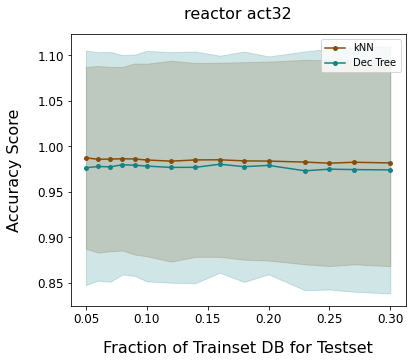

<Figure size 432x288 with 0 Axes>

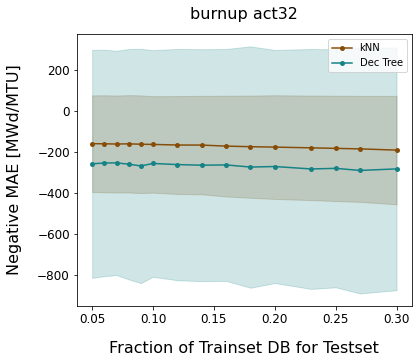

<Figure size 432x288 with 0 Axes>

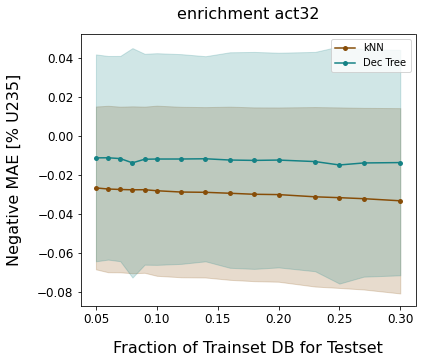

<Figure size 432x288 with 0 Axes>

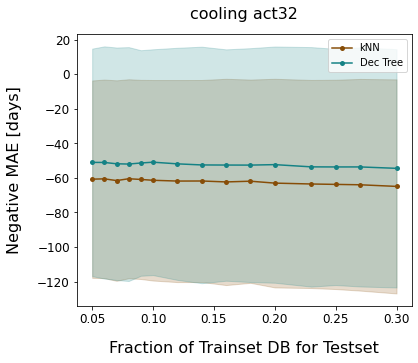

In [20]:
for p in pred:
    plot_learncurves(p, 1, 'act32')

<Figure size 432x288 with 0 Axes>

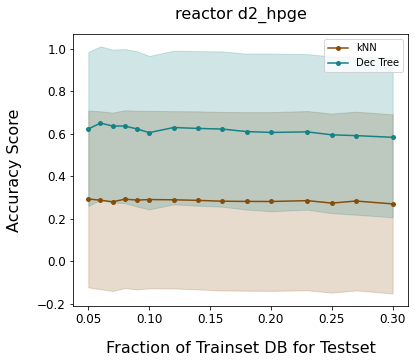

<Figure size 432x288 with 0 Axes>

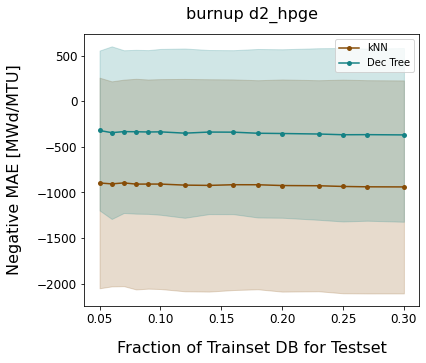

<Figure size 432x288 with 0 Axes>

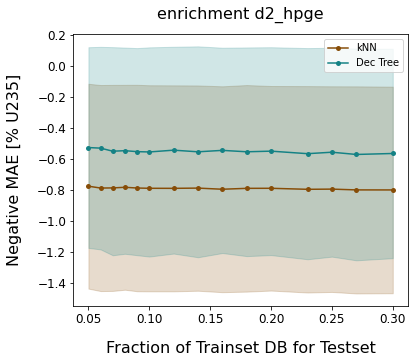

<Figure size 432x288 with 0 Axes>

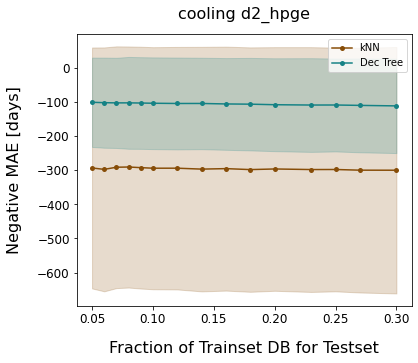

In [21]:
for p in pred:
    plot_learncurves(p, 4, 'auto')

<Figure size 432x288 with 0 Axes>

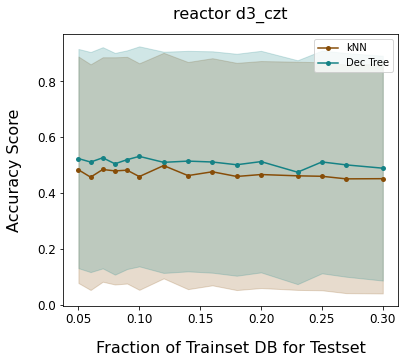

<Figure size 432x288 with 0 Axes>

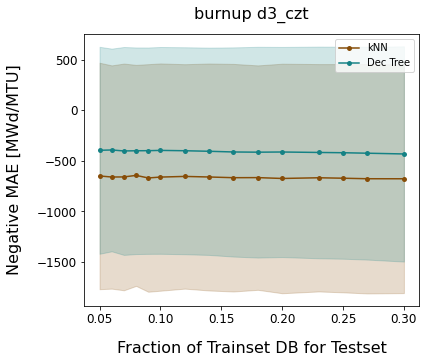

<Figure size 432x288 with 0 Axes>

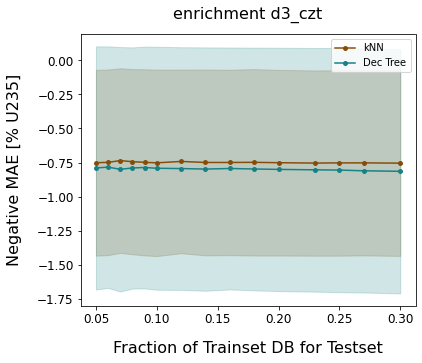

<Figure size 432x288 with 0 Axes>

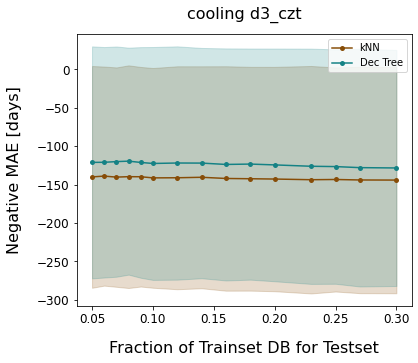

In [22]:
for p in pred:
    plot_learncurves(p, 5, 'auto')